<a href="https://colab.research.google.com/github/Liza-IITP/MachineLearning/blob/main/Perceptron_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Utilities for Synthetic Data Generation and Data Visualisation *

(100, 2)
[[ 0.82321545 -0.11697552]
 [ 0.37514771 -0.73115232]
 [ 0.26947761 -0.7081059 ]
 [-4.98744874 -2.01199214]
 [ 0.4231285   1.63493163]
 [-4.2289949   0.15599044]]
(100,)
[1 1 1 0 1 0]


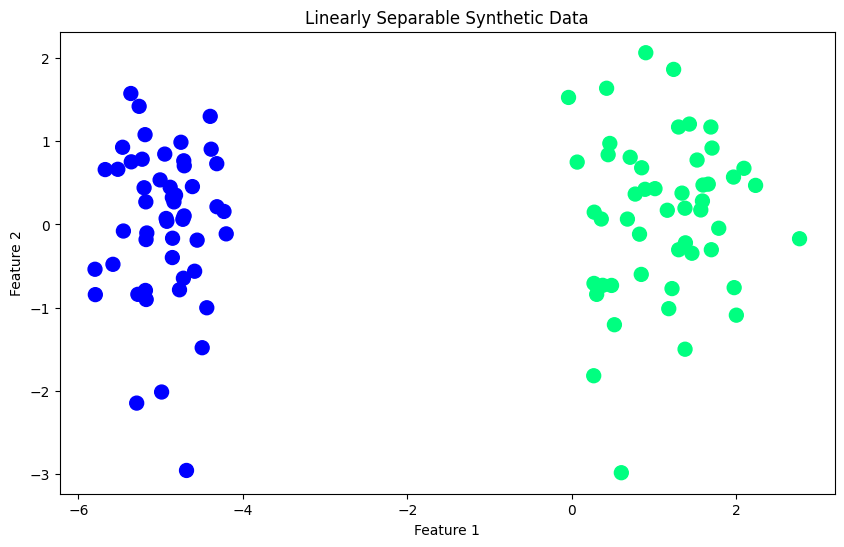

In [49]:
# Libraries and Utilities import
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

# Making the 100 labeled 2D data points
X,y = make_classification(n_samples=100,n_features = 2, n_informative=1 ,n_redundant = 0 ,n_classes = 2 , n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=30)
print(X.shape)
print(X[0:6])
print(y.shape)
print(y[0:6])

# 100 total samples , 2 features each , 1 of the 2 features actually helps distinguish between the classes ,  No redundant features , binary classification problem(0 or 1)
# each class form a single cluster ,random_state = 41 ensures same data every time ,  points won’t be spread across corners of a hypercube—useful for simple visualization
# Controls how far apart the classes are

plt.figure(figsize=(10,6)) # width and height of the plot in inches
plt.xlabel("Feature 1") # Say, cpi
plt.ylabel("Feature 2") # Say , iq
plt.title("Linearly Separable Synthetic Data") # May be a placement data , whether a student getting placd or not
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100) # Color Coding based on y (0 or 1) #S is for size of the points #cmap is color specification
# X is a 2D array or matrix of 100 rows and 2 columns feature 1 and feature 2
# So selecting all its rows first feature in X[:,0] while second feature in X[:,1] , it return a 1D array of the respective features

# *Previous Perceptron Model*

Line equation becomes : 1.2000000000000002 + 1.1204052979148558*Feature1 + 0.4038151367720968*Feature2


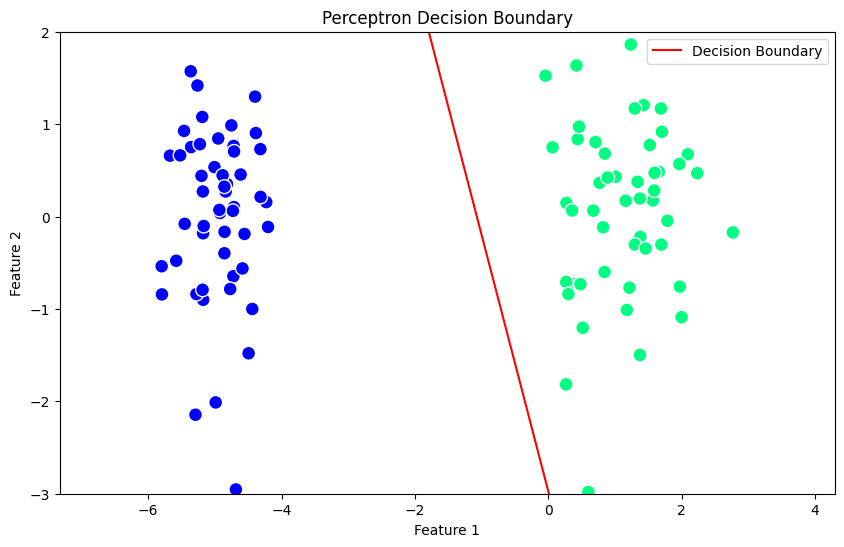

In [50]:
def step(z):
    return 1 if z>0 else 0

def perceptron(X,y) :
  # W0*X0 , W1*X1, W2*X2 # Here , X0 must be 1 to get the equation as AX+BY+C =0 , X1 and X2 are the two features used
  X = np.insert(X,0,1,axis=1) # adding a bias term (column of 1s) to X at 0th col axis column-wise
  weights = np.ones(X.shape[1]) # Number of Columns (now 3)
  lr = 0.1 # Learning rate
  epochs = 2000
  for i in range(epochs):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]
# To directly get intercept , W0 + W1X1 +W2X2 = 0 => -W0/W2 = INTERCEPT , -W1/W2 = SLOPE , USING BOTH WE CAN PLOT LINE
bias, weights = perceptron(X, y)
print(f"Line equation becomes : {bias} + {weights[0]}*Feature1 + {weights[1]}*Feature2")



# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100, edgecolor='w')

# Plot decision boundary line
# Equation: w0 + w1*x + w2*y = 0 => y = (-w0 - w1*x)/w2
x_values = np.array([min(X[:, 0]) - 1, max(X[:, 0]) + 1])
y_values = (-bias - weights[0] * x_values) / weights[1]

plt.plot(x_values, y_values, label='Decision Boundary', color='red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.ylim(-3,2)
plt.legend()
plt.show()

# *Sigmoid Function and Perceptron*

Line Equation : 2.5676684534692042x+0.11454327951595422y+3.060252657027506= 0
y = -22.41657881911409*x+-26.716998762037864


(-3.0, 2.0)

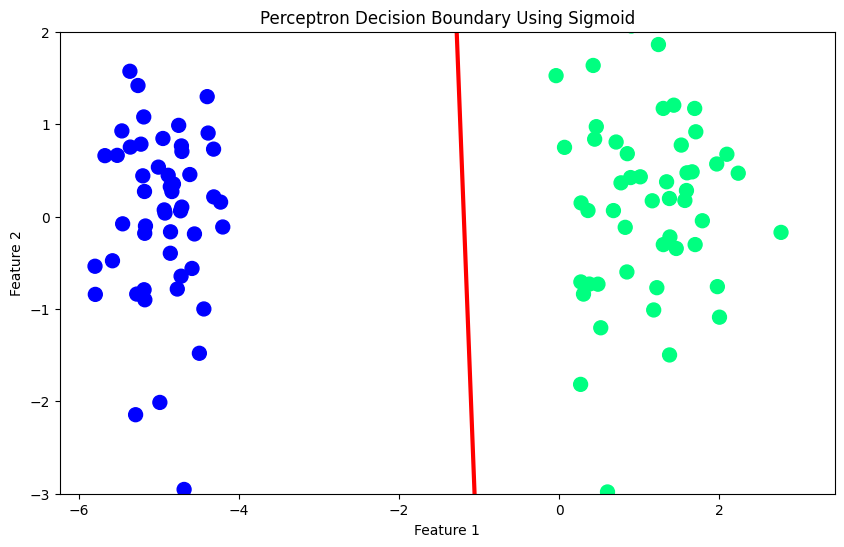

In [51]:
# Defining Sigmoid Function
def sigmoid(z) :
  return 1/(1+np.exp(-z))

# Making Perceptron Function
def perceptron(X,y) :
  X_temp = X.copy()
  X = np.insert(X,0,1,axis = 1) # to insert the bias column ahead of the two features (as 0th column)
  weights = np.ones(X.shape[1]) # Now after inserting the bias column the count becomes 3 so , weights = [1,1,1]
  learning_rate = 0.1
  epochs = 2000
  for i in range(epochs) :
    j = np.random.randint(0,100) # To pick the point according to which line is to be adjusted
    y_hat = sigmoid(np.dot(weights,X[j]))
    weights = weights +  learning_rate*(y[j]-y_hat)*X[j]
  X = X_temp
  return weights[0],weights[1:]

# AX+BY+C = 0
C,[A,B]  = perceptron(X,y)
print(f"Line Equation : {A}x+{B}y+{C}= 0")

# Getting the
intercept = -C/B
slope = -A/B
print(f"y = {slope}*x+{intercept}")
# Plot data points and line so obtained
x_input = np.linspace(-3,3,100)
y_input = slope*x_input + intercept
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary Using Sigmoid')
plt.ylim(-3,2)
